# Описание проекта

Мы работаем на добывающую компанию «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

В нашем распроряжении  пробы нефти из трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 
Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. 
Также необходимо проанализировать возможную прибыль и риски техникой *Bootstrap*


In [1]:
# блок импорта
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Подготовка моделей
from numpy.random import RandomState
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Модели (в нашем случае актуальна только линейная регрессия)
from sklearn.linear_model import LinearRegression

# Метрики
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy import stats as st

## Первичный анализ данных

In [2]:
try:
    df1 = pd.read_csv('geo_data_0.csv')
    df2 = pd.read_csv('geo_data_1.csv')
    df3 = pd.read_csv('geo_data_2.csv')
except FileNotFoundError: 
    df1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    df2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    df3 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

In [3]:
df1.head(5)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
df2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
df3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [10]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [11]:
df3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [12]:
df1.duplicated().sum() #Дубликатов не обнаружено 

0

In [13]:
df2.duplicated().sum() #Дубликатов не обнаружено 

0

In [14]:
df3.duplicated().sum() #Дубликатов не обнаружено 

0

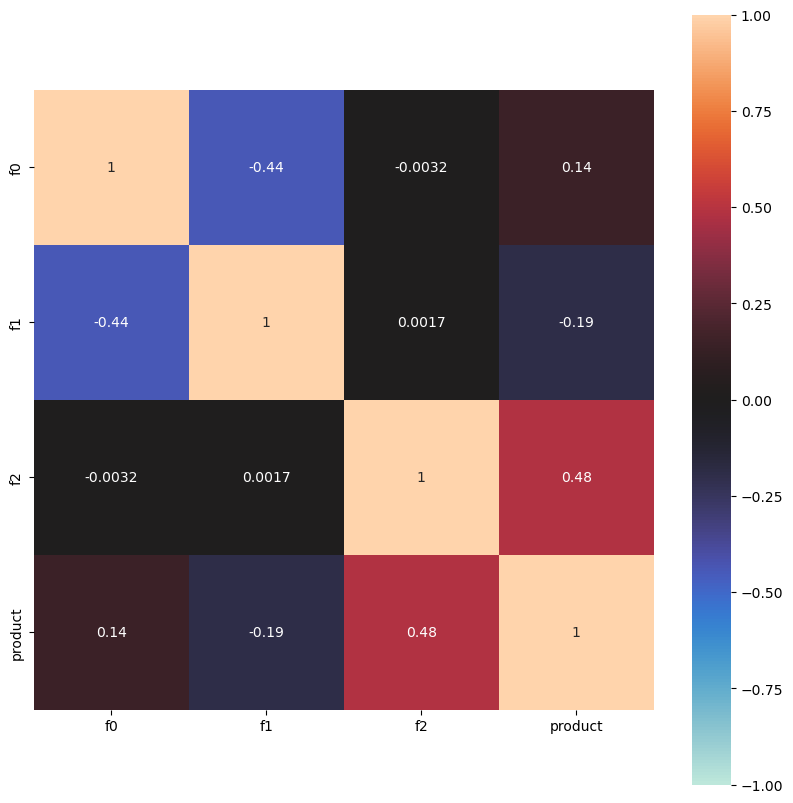

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True, square=True, vmin=-1, vmax=1, center=0, ax=ax);



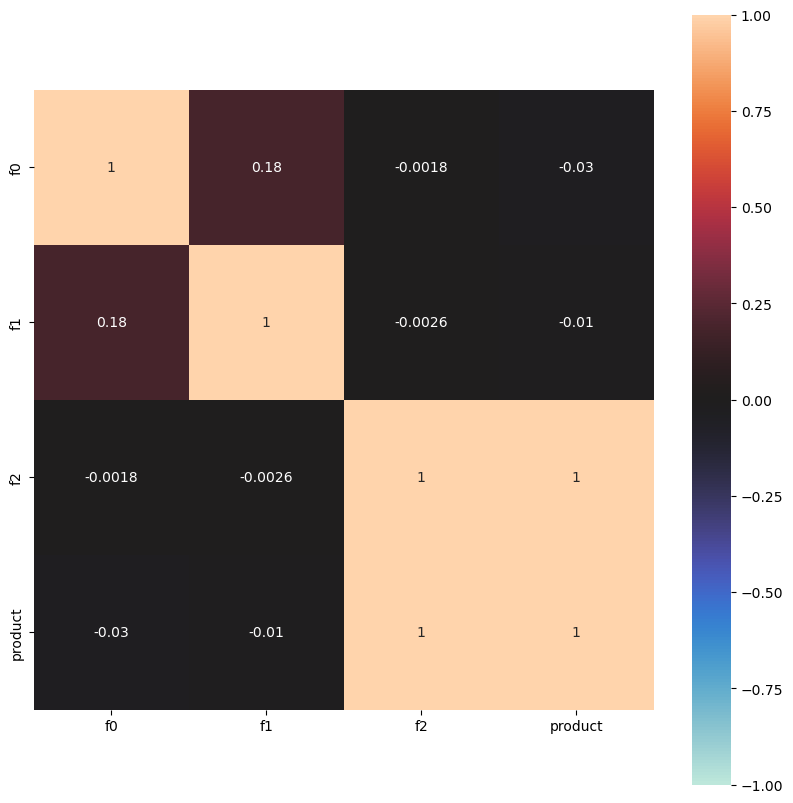

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df2.corr(), annot=True, square=True, vmin=-1, vmax=1, center=0, ax=ax);

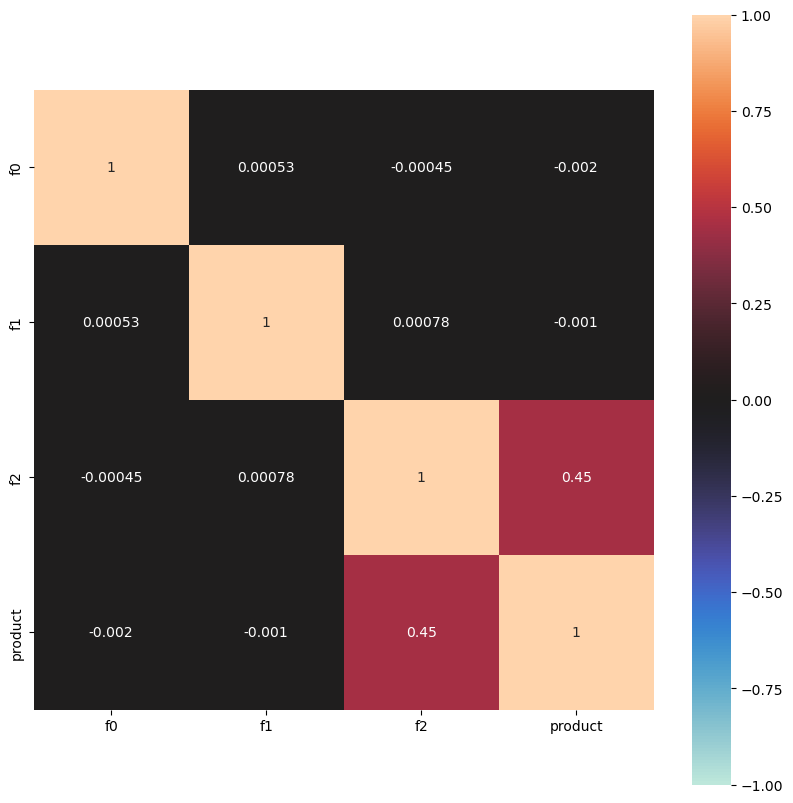

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df3.corr(), annot=True, square=True, vmin=-1, vmax=1, center=0, ax=ax);

## Вывод по первичному анализу данных
- Все датафреймы содержат одинаковое количество данных.
- Пропуски не обнаружены.
- Дубликаты не найдены.
- Сильной корреляции между признаками в первом и третьем районах не обранужено, однако стоит отметить, что во второй районе есть прямая зависимось `f2` и `product`.

Данные готовы для дальнейшего анализа

# Подготовка данных для машинного обучения

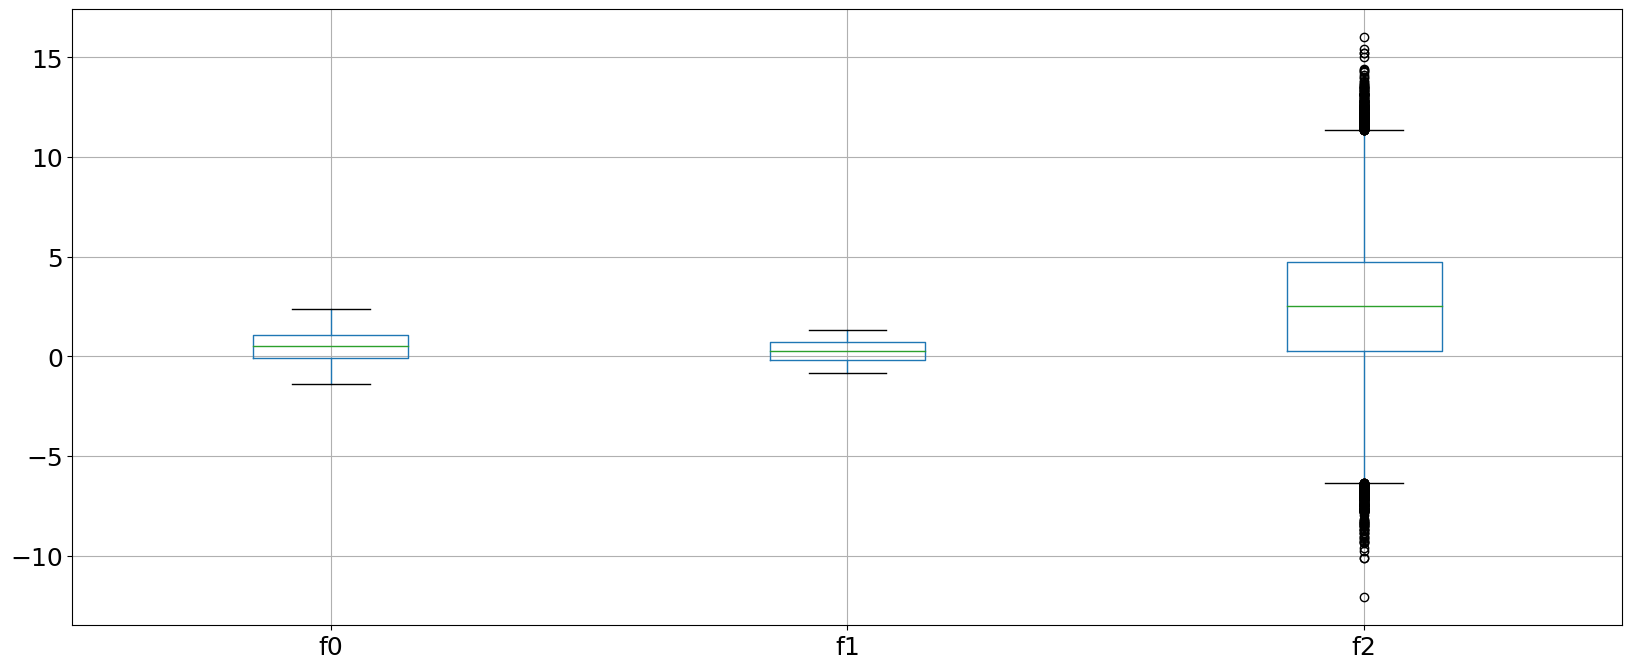

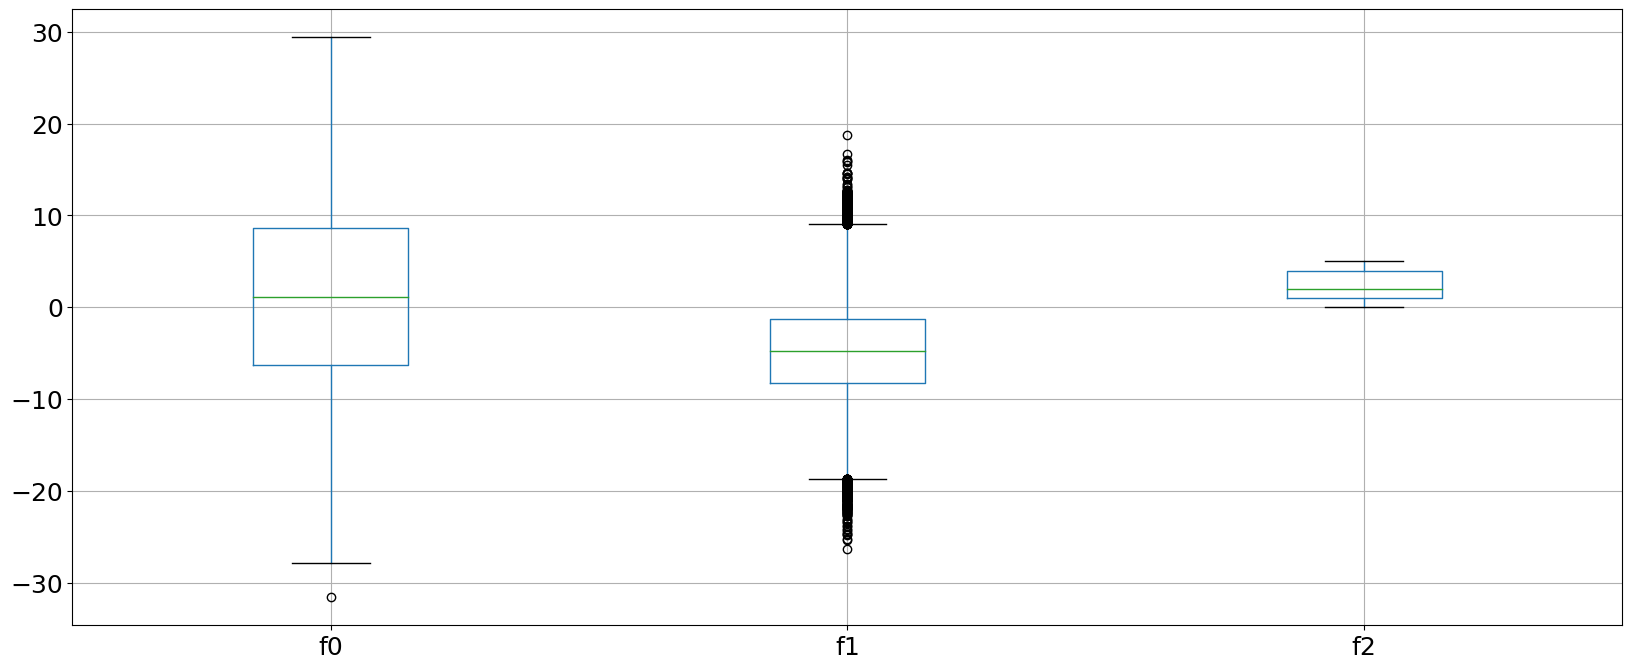

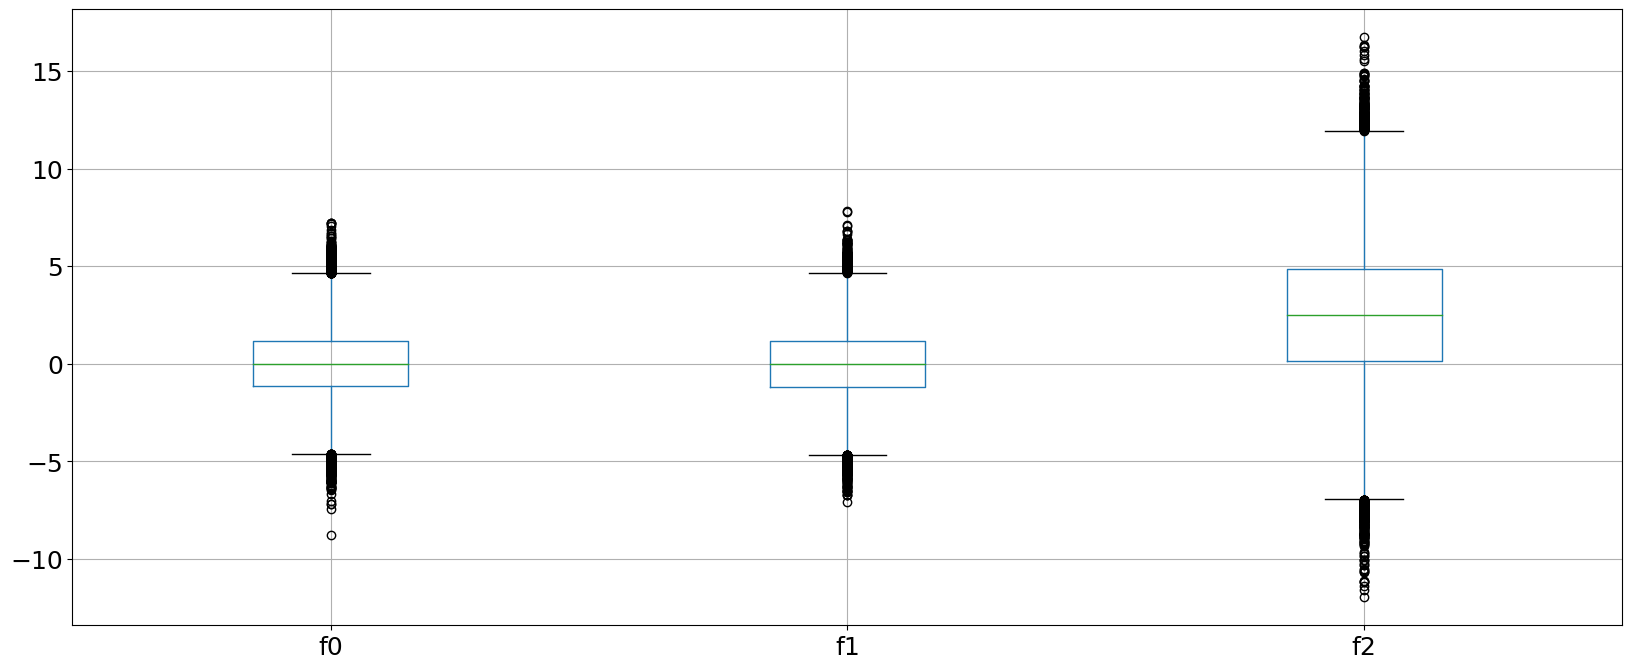

In [18]:
# Оценим разброс целевых признаков и проведем их дальнейшую коррекцию
fields = ['f0', 'f1', 'f2']

for df in [df1, df2, df3]:
    df.boxplot(column=fields,figsize=(20,8), fontsize=18, grid=True);
    plt.show()

In [19]:
df1 = df1[(df1['f2'] <= df1['f2'].quantile(0.99)) & (df1['f2'] >= df1['f2'].quantile(0.01))]
df2 = df2[(df2['f1'] <= df2['f1'].quantile(0.99)) & (df2['f1'] >= df2['f1'].quantile(0.01))]
df3 = df3[(df3['f0'] <= df3['f0'].quantile(0.99)) & (df3['f0'] >= df3['f0'].quantile(0.01)) &
          (df3['f1'] <= df3['f1'].quantile(0.99)) & (df3['f1'] >= df3['f1'].quantile(0.01)) &
          (df3['f2'] <= df3['f2'].quantile(0.99)) & (df3['f2'] >= df3['f2'].quantile(0.01))]


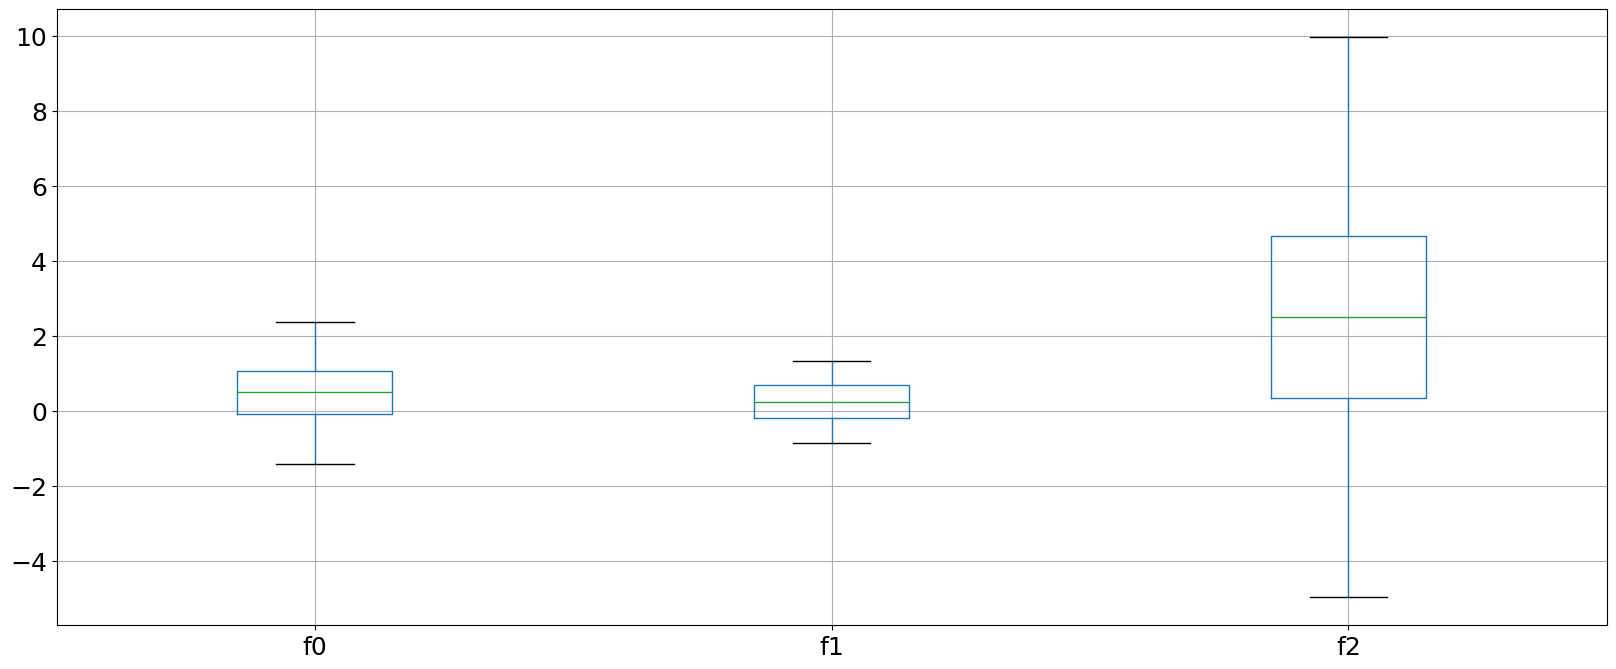

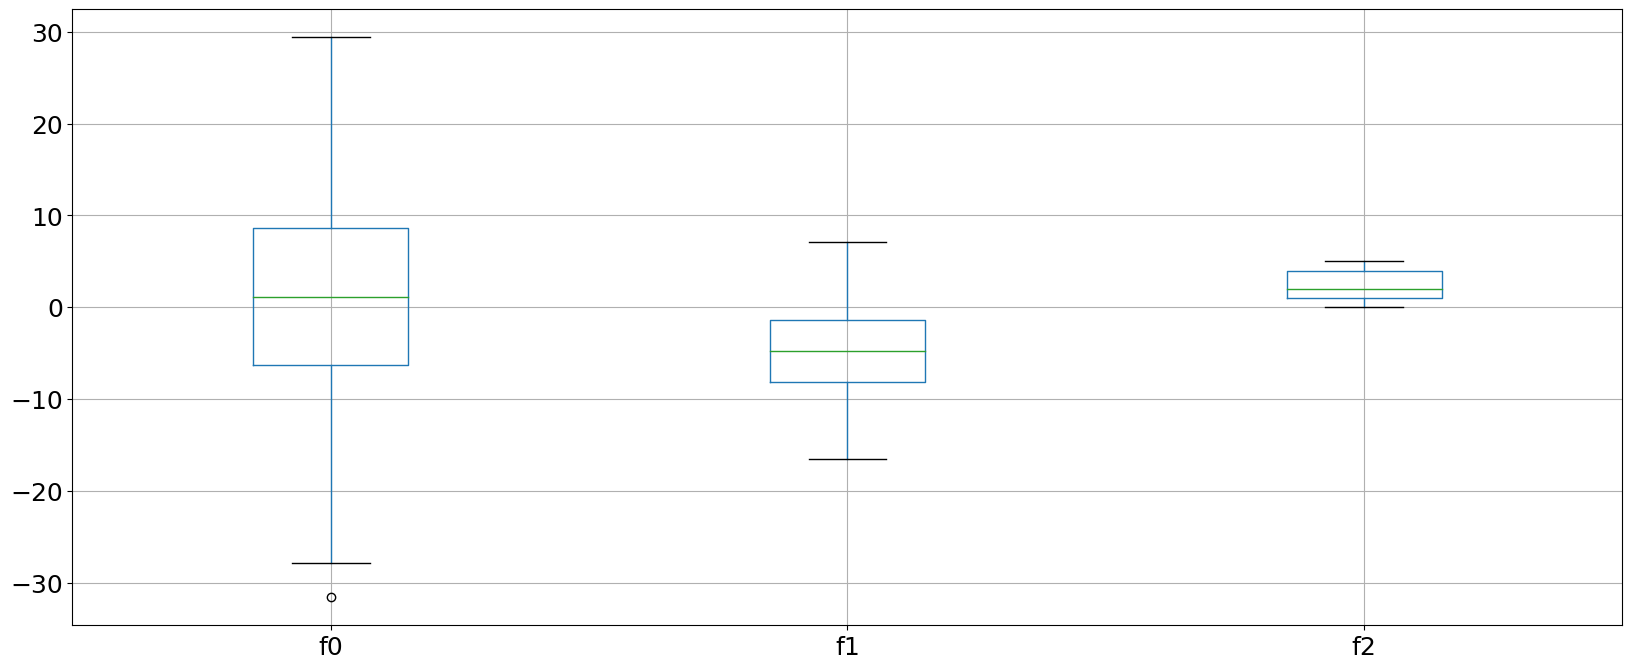

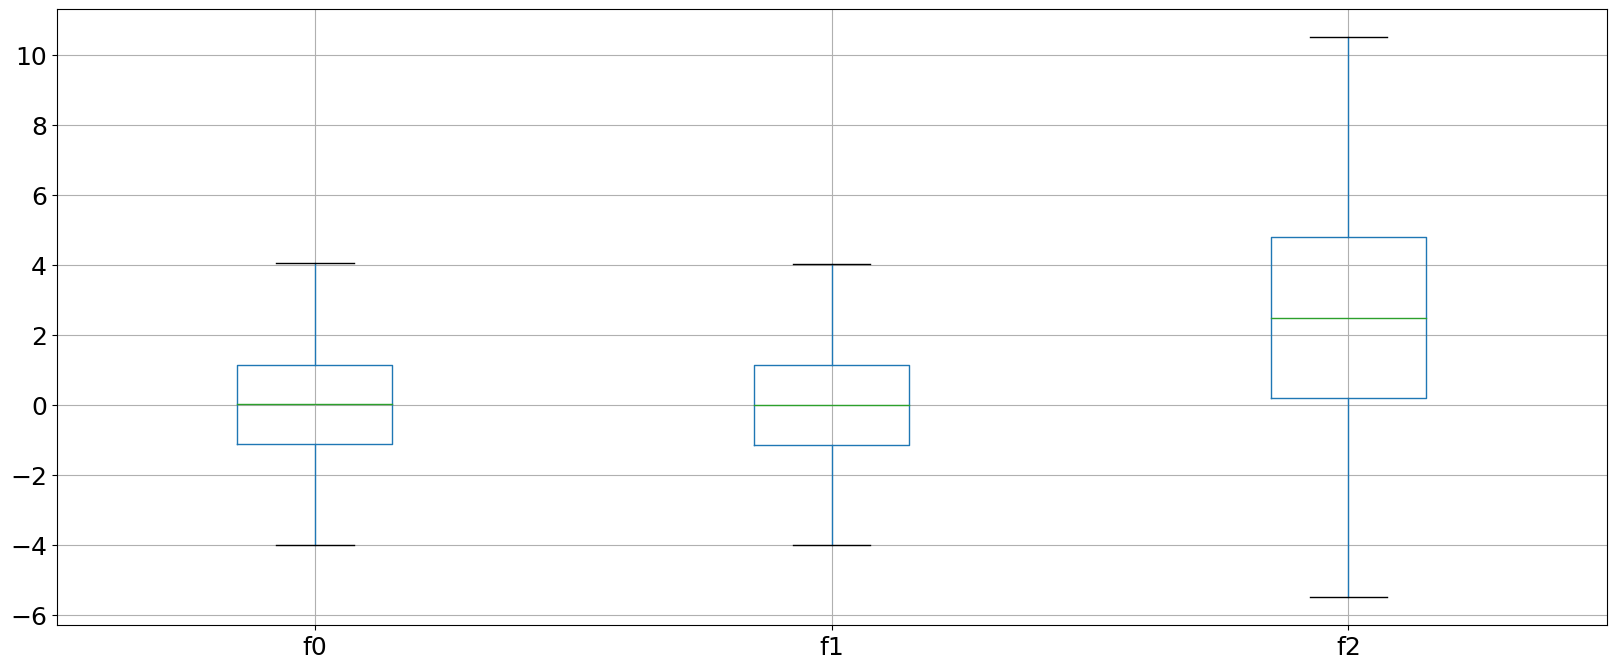

In [20]:
for df in [df1, df2, df3]:
    df.boxplot(column=fields,figsize=(20,8), fontsize=18, grid=True);
    plt.show()

In [21]:
# Проверим, что не удалили много лишнего
for df in [df1, df2, df3]:
    # сбросим индексы
    df.reset_index(inplace=True)
    print(df.count())

index      98000
id         98000
f0         98000
f1         98000
f2         98000
product    98000
dtype: int64
index      98000
id         98000
f0         98000
f1         98000
f2         98000
product    98000
dtype: int64
index      94119
id         94119
f0         94119
f1         94119
f2         94119
product    94119
dtype: int64


## Промежуточный вывод
Проанализировав все три датафрейма на предмет разброса клювевых признаков были скореектированы крайние значения.

Потери несущественны, качество данных для обучения моделей машинного обучения улучено.

## Проверка и обучение моделей машинного обучения

In [22]:
RANDOM_SEED = 12345

In [23]:
# Создадим функцию которая поможет в разбиении датафреймов на выборки

def split(df):
    target = df['product']
    features = df[['f0', 'f1', 'f2']]
    return train_test_split(features, target, test_size=0.25, random_state=RANDOM_SEED)

In [24]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = split(df1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = split(df2)
features_train_3, features_valid_3, target_train_3, target_valid_3 = split(df3)

In [25]:
# Линейная регрессия работает тем лучше, чем более стандартизованные данные к ней попадают
# Поэтому в ход далее пойдет Scaler
def scale_features(features_train, features_valid):
    # У каждого фрейма должен быть свой скалер
    scaler = StandardScaler()
    numeric = ['f0', 'f1', 'f2']
    scaler.fit(features_train[numeric])
    pd.set_option('mode.chained_assignment', None)
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    
    return features_train, features_valid

In [26]:
features_train_1, features_valid_1 = scale_features(features_train_1, features_valid_1)
features_train_2, features_valid_2 = scale_features(features_train_2, features_valid_2)
features_train_3, features_valid_3 = scale_features(features_train_3, features_valid_3)

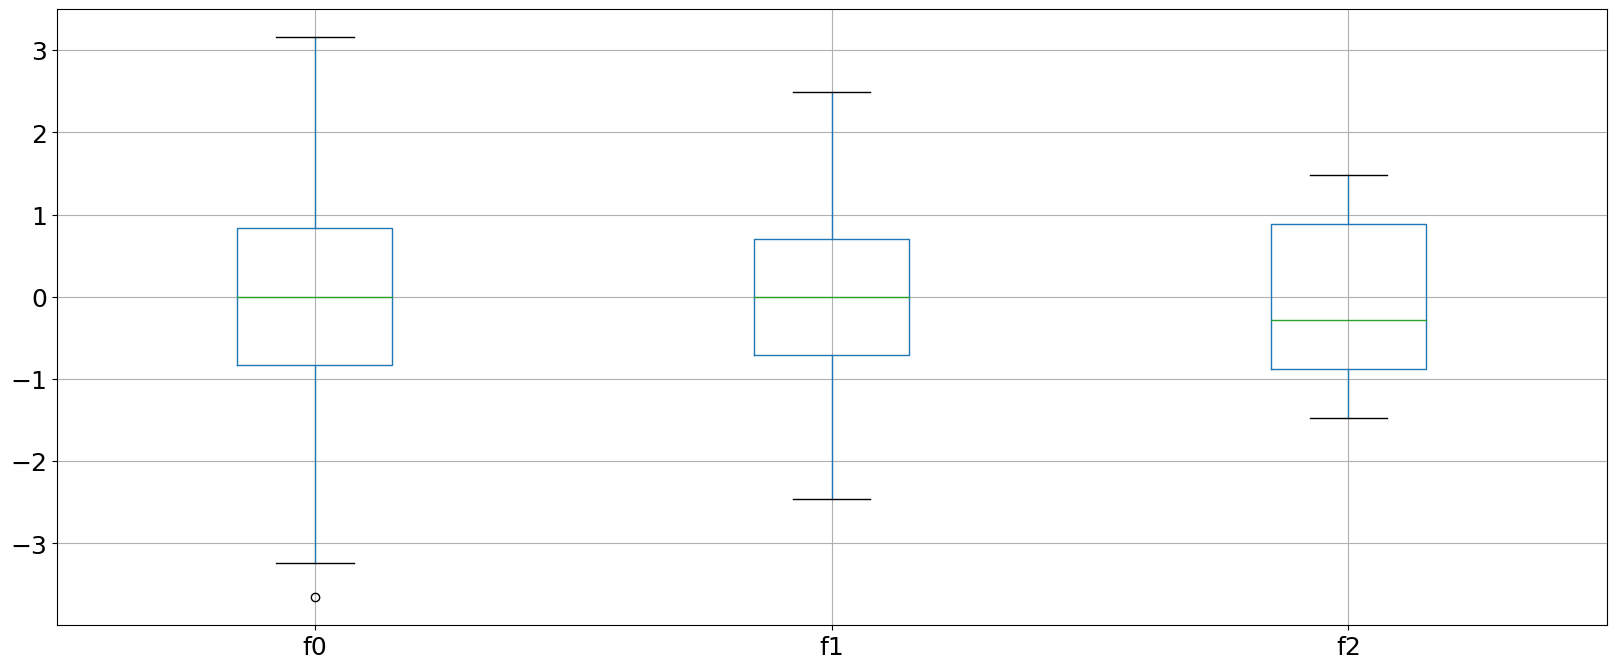

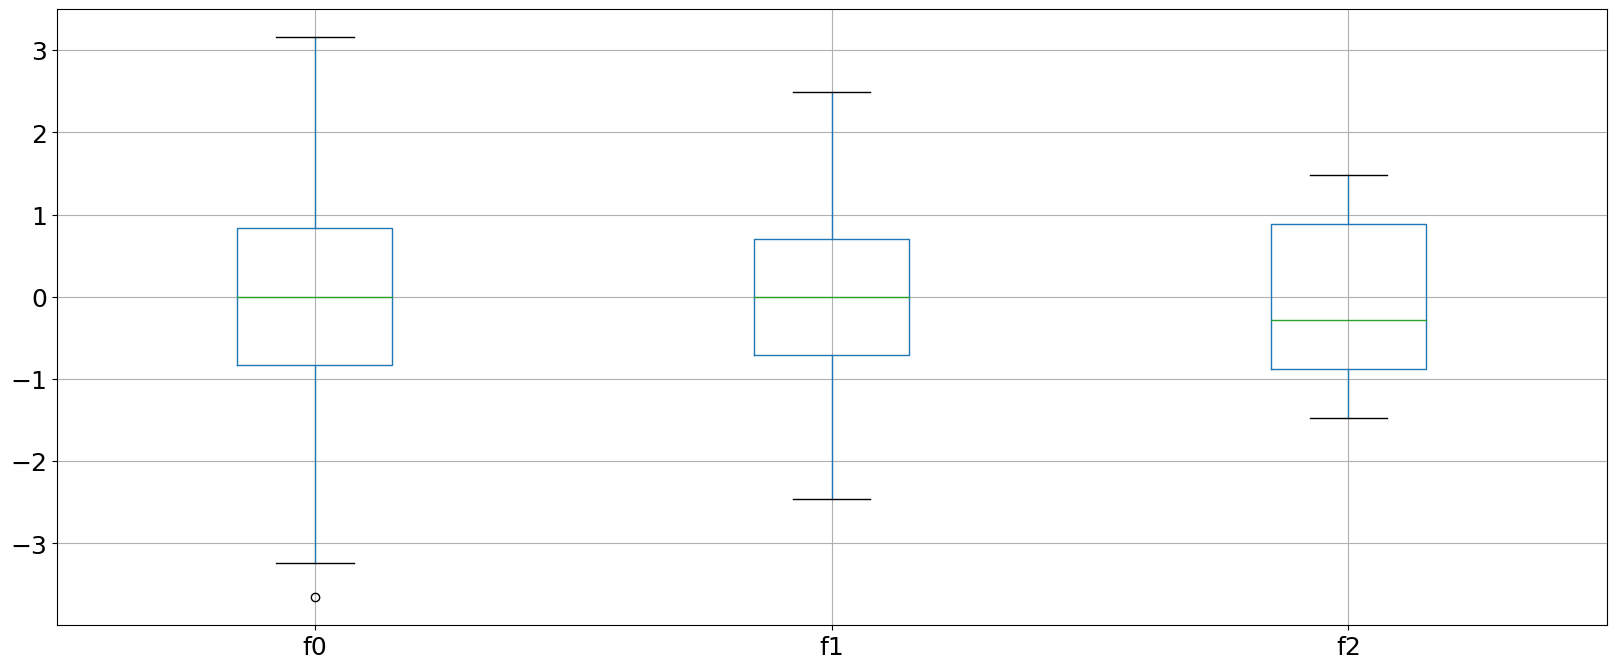

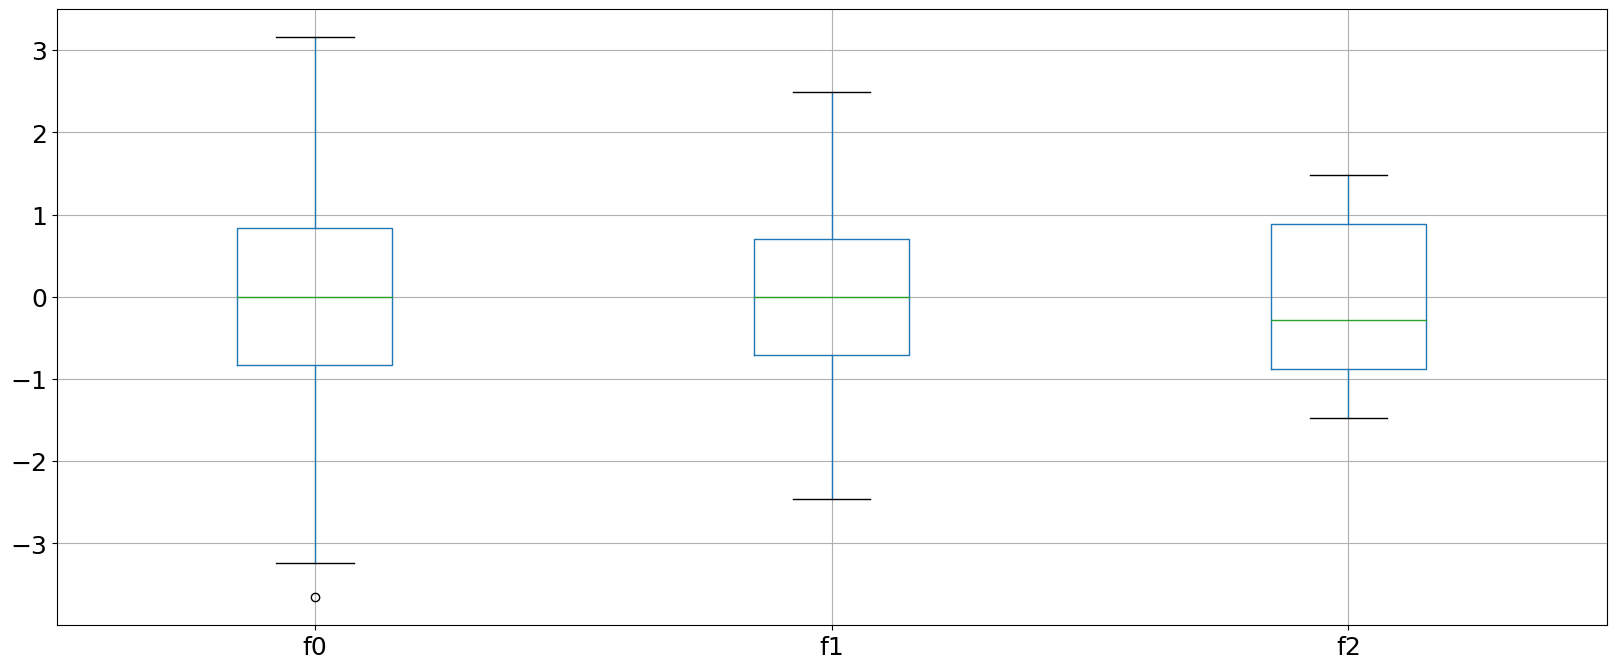

In [27]:
for df in [features_train_2, features_train_2, features_train_2]:
    df.boxplot(column=fields,figsize=(20,8), fontsize=18, grid=True);
    plt.show()

## Промежуточный вывод
Стандартизация целевых признаков на лицо

Данные очищены, стандартизованы и готовы к приминению в моделях машинного обучения, приступаем!

In [28]:
# Создадим функцию, которая будет возвращать нам rmse
def rmse(target, predicted):
    mse = mean_squared_error(target, predicted,squared=False)
    return mse

In [29]:
# Для удобства визуализации создадим функцию, которая будет выводить посчитанные MSE, RMSE, R2
def full_score_info(target, predicted):
    mse = mean_squared_error(target, predicted)
    rmse_val = rmse(target, predicted)
    r2 = r2_score(target, predicted)
    mae = mean_absolute_error(target, predicted)
    predicted_mean = predicted.mean()
    
    print('╎{: >9}╎{: >9}╎{: >9}╎{: >9}╎{: >15}╎'.format('RMSE', 'MSE', 'R2', 'MAE', 'Predicted mean'))
    print('╎{: >9.6f}╎{: >9.4f}╎{: >9.7f}╎{: >9.6f}╎{: >15.6f}╎'.format(rmse_val, mse, r2, mae, predicted_mean))
    
    # по условиям задачи дальше нам интересно сохранять средние предсказанные значения и rmse
    return rmse, predicted_mean

In [30]:
# Ну и финально создадим функцию с логической регрессией
def train_the_model(features_train, target_train, features_valid, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    predicted_mean, rmse = full_score_info(target_valid, predicted_valid)
    
    return predicted_mean, rmse, predicted_valid

In [31]:
#Выведем информацию по каждой модели, а итоговые предсказания для удобства сразу переведем в Series

print('Model for region 1');
predicted_mean_1, rmse_1, predicted_valid_1 = train_the_model(
    features_train_1, target_train_1, 
    features_valid_1, target_valid_1)
predicted_valid_df_1 = pd.Series(data=predicted_valid_1, index=target_valid_1.index)
print('')
print('Model for region 2');
predicted_mean_2, rmse_2, predicted_valid_2 = train_the_model(
    features_train_2, target_train_2,
    features_valid_2, target_valid_2)
predicted_valid_df_2 = pd.Series(data=predicted_valid_2, index=target_valid_2.index)
print('')
print('Model for region 3');
predicted_mean_3, rmse_3, predicted_valid_3 = train_the_model(
    features_train_3, target_train_3,
    features_valid_3, target_valid_3)
predicted_valid_df_3 = pd.Series(data=predicted_valid_3, index=target_valid_3.index)

Model for region 1
╎     RMSE╎      MSE╎       R2╎      MAE╎ Predicted mean╎
╎37.653330╎1417.7733╎0.2657414╎30.998379╎      92.430598╎

Model for region 2
╎     RMSE╎      MSE╎       R2╎      MAE╎ Predicted mean╎
╎ 0.884445╎   0.7822╎0.9996292╎ 0.711625╎      68.853151╎

Model for region 3
╎     RMSE╎      MSE╎       R2╎      MAE╎ Predicted mean╎
╎40.275774╎1622.1380╎0.1853547╎33.010990╎      94.198017╎


## Вывод по проверке и обучению моделей машинного обучения

- Наиболее выгодными являются первый и третий регионы, но наряду с наибольшим предсказанным средним у этих регионов также и набольшая среднеквадратичная ошибка
- Второй регион напротив не может похвастаться столь высокими показателями предсказанного среднего, но его среднеквадратичная ошибка много меньше чем в других регионах

## Подготовка к расчету прибыли

In [32]:
# Внесем основные параметры задачи
POINTS_TO_EXPLORE_COUNT = 500 # сколько точек исследуют при разведке региона
POINTS_FOR_PROFIT_COUNT = 200 # по какому количеству точек считают прибыль (лучшие точки)
DEVELOPMENT_BUDGET = 10 * (10 ** 9) # бюджет на разработку (в рублях)
BARREL_PROFIT = 450 # стоимость одного барреля (в рублях)
PRODUCT_PROFIT = BARREL_PROFIT * 1000 # стоимость единицы продукта (в рублях)
LOSS_PROBABILITY_LIMIT = 2.5 # предельная вероятность убытков на регион (в процентах)

In [33]:
# Рассчитаем достаточный объём сырья для безубыточной разработки (региона)
MIN_PRODUCT_FOR_BREAK_EVEN_DEV_REGION = DEVELOPMENT_BUDGET / PRODUCT_PROFIT
MIN_PRODUCT_FOR_BREAK_EVEN_DEV_REGION

22222.222222222223

In [34]:
# Рассчитаем то же самое для скважины
MIN_PRODUCT_FOR_BREAK_EVEN_DEV_WELL = MIN_PRODUCT_FOR_BREAK_EVEN_DEV_REGION / POINTS_FOR_PROFIT_COUNT
MIN_PRODUCT_FOR_BREAK_EVEN_DEV_WELL

111.11111111111111

In [35]:
# Напишем функцию рассчета прибыли

def calculate_profit(target, probabilities):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:POINTS_FOR_PROFIT_COUNT]
    return selected.sum() * PRODUCT_PROFIT - DEVELOPMENT_BUDGET

In [36]:
# Посчитаем профит по каждому региону
print('Model for region 1 profit = ', calculate_profit(target_valid_1, predicted_valid_df_1));
print('Model for region 2 profit = ', calculate_profit(target_valid_2, predicted_valid_df_2));
print('Model for region 3 profit = ', calculate_profit(target_valid_3, predicted_valid_df_3));

Model for region 1 profit =  3039664461.291294
Model for region 2 profit =  2415086696.681511
Model for region 3 profit =  2205291089.0485516


## Вывод по подготовке к расчету прибыли

1. В нашем случае, для разработки в ноль необходимо чтобы каждая скважина из 200, по которым рассчитывается прибыль, приносила не меньше 111 едниц продукта
2. При этом средние значения, которые мы предсказали для всех регионов меньше данного значения
3. Тем не менее, в каждом регионе мы имеем положительную прибыль от разработки

## Расчет прибыли и рисков

In [37]:
# Напишем функцию для наших вычислений
def make_bootstrap(target, probabilities):
    # для начала определим state (RANDOM_SEED нам не подойдет, т.к. всегда будет возвращать одну выборку)
    state = np.random.RandomState(12345)

    values = []
    for i in range(1000):
        target_subsample = target.sample(n=POINTS_TO_EXPLORE_COUNT, replace=True, random_state=state)
        probs_subsample = probabilities[target_subsample.index]
    
        values.append(calculate_profit(target_subsample, probs_subsample))

    values = pd.Series(values)
    
    alpha = 0.95
    df = values.count() - 1
    confidence_interval = st.t.interval(alpha, df, loc=values.mean(), scale=values.sem())
    
    lower = values.quantile(0.01)
 
    mean = values.mean()
    print("Средняя прибыль:", mean)
    print("95% доверительный интервал (истинное среднее)", confidence_interval)
    confidence_interval = (values.quantile(0.025), values.quantile(0.975))
    print("95% доверительный интервал (прогноз)", confidence_interval)
    
    loss_probability = values[values < 0].count() / values.count()
    print('Вероятность убытка = {:.2%}'.format(loss_probability))
    
    if (loss_probability*100 <= LOSS_PROBABILITY_LIMIT):
        print('Регион годится для разработки!')
    else: 
        print('Регион не годится для разработки!')
    print()

In [38]:
print('Model for region 1');
make_bootstrap(target_valid_1, predicted_valid_df_1)
print('Model for region 2');
make_bootstrap(target_valid_2, predicted_valid_df_2)
print('Model for region 3');
make_bootstrap(target_valid_3, predicted_valid_df_3)

Model for region 1
Средняя прибыль: 364179128.70529276
95% доверительный интервал (истинное среднее) (346772097.3036407, 381586160.1069448)
95% доверительный интервал (прогноз) (-186998128.70111564, 934783134.4544964)
Вероятность убытка = 8.50%
Регион не годится для разработки!

Model for region 2
Средняя прибыль: 506969166.58348984
95% доверительный интервал (истинное среднее) (493528677.823248, 520409655.34373164)
95% доверительный интервал (прогноз) (76604664.63100925, 929372152.092638)
Вероятность убытка = 1.00%
Регион годится для разработки!

Model for region 3
Средняя прибыль: 262714932.65371305
95% доверительный интервал (истинное среднее) (245674789.36083272, 279755075.9465934)
95% доверительный интервал (прогноз) (-281247499.5276992, 804019467.7805871)
Вероятность убытка = 17.30%
Регион не годится для разработки!



## Промежуточный вывод

Ура, ура, подходящий регион найден, а именно, регион 2. С 95% вероятностью прибыль превысит 493 миллиона, вероятность убытка в данном регионе 1%.

# Обший вывод

Мы проделали немалую работу, пройдя все стандартные этапы работы с датафреймами.
- Изучили данные, избавились от выбросов.
- Стандартизировали целевые признаки.
- Обучили Логическую регрессию предсказывать значения и получили промежуточные оценки трех представленных регионов.
     - Второй регион на данном этапе показывал наименьшее предсказанное среднее.
- Рассчитали прибыльность каждого из районов.
- Применили бутстрап, чтобы оценить каждый из регионов со всех возможных сторон, получив средние значения генеральной совокупности.

По итогам проведенной работы можно констатировать, что каждый из трех регионов оказался безубыточным, прямо скажем прибыльным, однако при заявленным показателях только второй регион годится для разработки. 

Наилучшие показатели отмечаются во втором регионе, так как он отрывается от двух других сразу по двум ключевым метрикам. Второй регион принесет больше всего прибыли, а именно свыше 506 миллионов рубей, а также выбрав данный регион для разработки компания потерпил убытки всего в 1%. (данный показатель является минимальным для всех трех регионов)